In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('../../data/biofuel-production.csv')

## Data Description



In [3]:
print(f"File containd NaN-values: {df.isnull().values.any()}")
df.head()

File containd NaN-values: True


,Entity,Code,Year,Biofuels production - TWh
0,Africa (EI),NaN,1990,0.305102
1,Africa (EI),NaN,1991,0.305102
2,Africa (EI),NaN,1992,0.305290
3,Africa (EI),NaN,1993,0.068617
4,Africa (EI),NaN,1994,0.068617


In [4]:
df.columns

Index(['Entity', 'Code', 'Year', 'Biofuels production - TWh'], dtype='object')

**Entity**: country (categirical)

**Code**: Country code (categorical)

**Year**: (numerical)

**Biofuels production - TWh**: energy generated from biofuels, measured in terawatt-hours (numerical)

In [5]:
df['Biofuels production - TWh'].describe()

count    1134.000000
mean       87.256907
std       160.247639
min         0.000000
25%         1.894032
50%        16.540880
75%        93.439810
max      1187.204300
Name: Biofuels production - TWh, dtype: float64

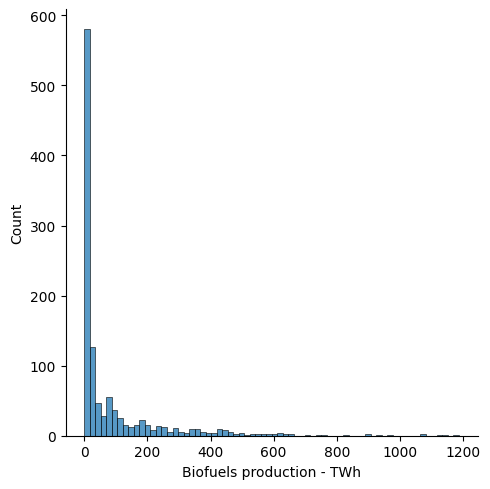

In [6]:
sns.displot(df['Biofuels production - TWh'])

In [7]:
#skewness and kurtosis
print(df['Biofuels production - TWh'].skew())
print(df['Biofuels production - TWh'].kurtosis())

3.055522742248494
11.74257852888138


<Axes: xlabel='Biofuels production - TWh', ylabel='Year'>

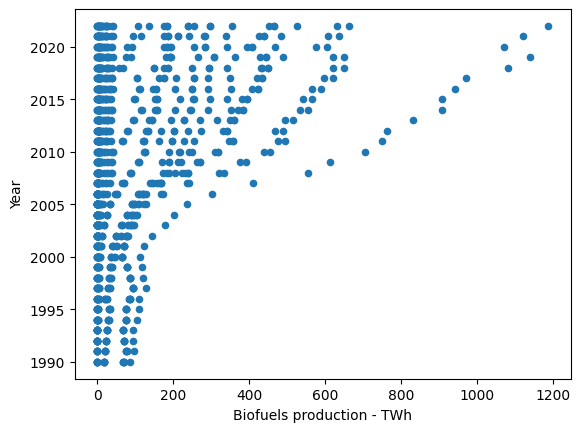

In [12]:
data = pd.concat([df['Biofuels production - TWh'], df['Year']], axis=1)
data.plot.scatter(x='Biofuels production - TWh', y='Year')

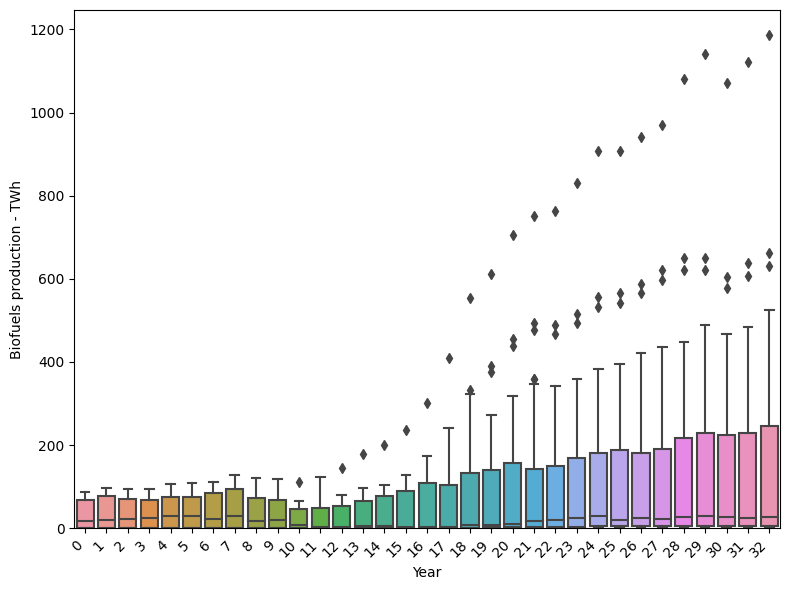

In [14]:
data = pd.concat([df['Biofuels production - TWh'], df['Year']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Year'], y='Biofuels production - TWh', data=data)
fig.axis(ymin=0)
ax.set_xticklabels(ax.get_xticks(), rotation = 45, ha='right')
plt.tight_layout()  
plt.show()

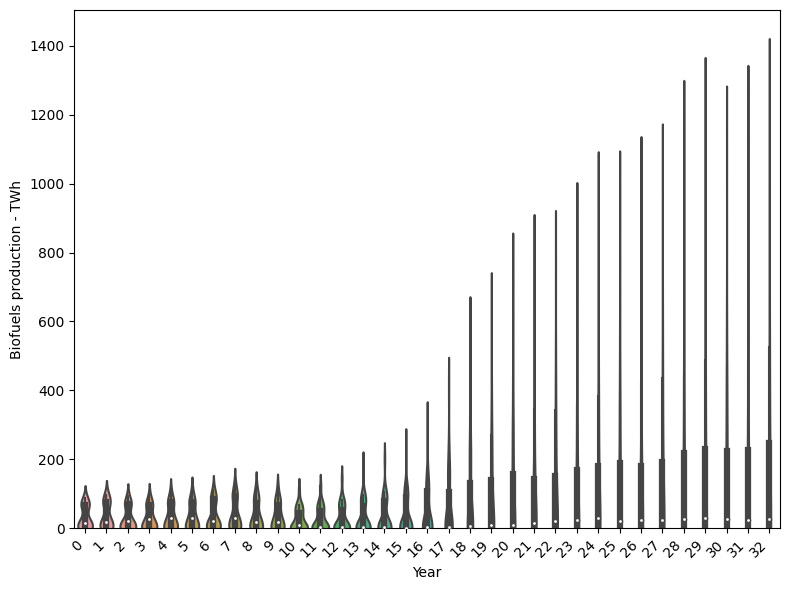

In [15]:
data = pd.concat([df['Biofuels production - TWh'], df['Year']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.violinplot(x=df['Year'], y='Biofuels production - TWh', data=data)
fig.axis(ymin=0)
ax.set_xticklabels(ax.get_xticks(), rotation = 45, ha='right')
plt.tight_layout()  
plt.show()

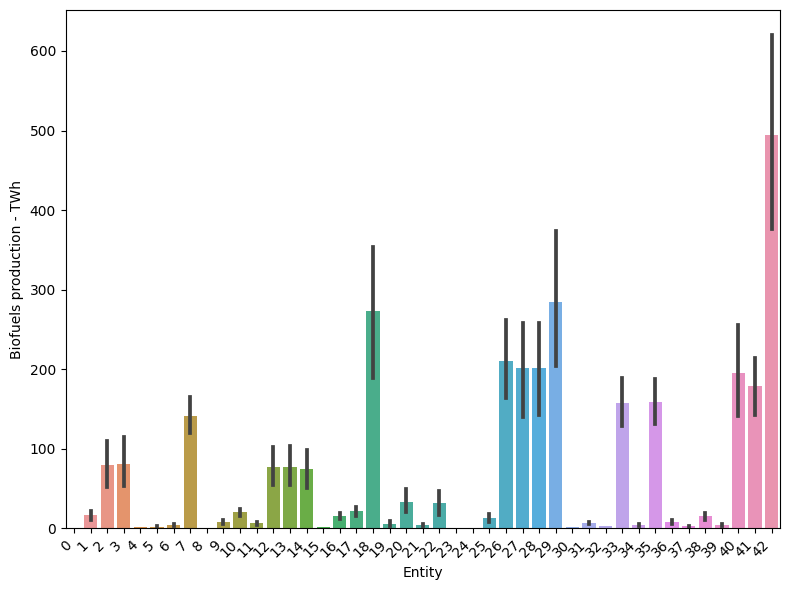

In [17]:
data = []
ename = set(df['Entity'])


f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=df['Entity'], y='Biofuels production - TWh', data=data)
fig.axis(ymin=0)
ax.set_xticklabels(ax.get_xticks(), rotation = 45, ha='right')
plt.tight_layout()  
plt.show()